In [ ]:
from pydrake.all import (
    MathematicalProgram,
    DecomposeLinearExpressions,
    L2NormCost,
    Binding,
    Cost,
)
import numpy as np

## Understanding DecomposeLinearExpressions()

In [ ]:
prog = MathematicalProgram()

x = prog.NewContinuousVariables(3)
exprs = [x[0] * 5 - x[1], x[1] * 2, x[2] * 3 + x[0]]
A = DecomposeLinearExpressions(exprs, x)
print(A)

In [ ]:
prog = MathematicalProgram()

x = prog.NewContinuousVariables(2, 2)
exprs = x[0] - x[1]
A = DecomposeLinearExpressions(exprs, x.flatten())
print(A)
b = np.zeros((A.shape[0], 1))
print(b)
l2_norm_cost = L2NormCost(A, b)
prog.AddCost(l2_norm_cost, x.flatten())

In [8]:
import numpy as np
from pydrake.all import MathematicalProgram, QuadraticCost

n = 2  # Dimension of x1 and x2
prog = MathematicalProgram()

x = prog.NewContinuousVariables(2, n).reshape(1, 2 * n)
I_n = np.identity(n)
Q = np.block([[I_n, -I_n], [-I_n, I_n]])
b = np.zeros((2 * n, 1))
c = 0
cost = QuadraticCost(Q, b, c)
prog.AddCost(cost, x.flatten())
expr = (x @ Q @ x.T).flatten()[0]
print(Q)
print(expr.Expand())

[[ 1.  0. -1. -0.]
 [ 0.  1. -0. -1.]
 [-1. -0.  1.  0.]
 [-0. -1.  0.  1.]]
( - 2 * (x(0,0) * x(1,0)) - 2 * (x(0,1) * x(1,1)) + pow(x(0,0), 2) + pow(x(1,0), 2) + pow(x(0,1), 2) + pow(x(1,1), 2))


[[ 0.         -1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [-1.          0.        ]
 [-0.83205029  0.5547002 ]]
[-1.         11.          9.         -1.          0.83205029]


/var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/ipykernel_2526/3839834863.py:12: RuntimeWarning: invalid value encountered in subtract
  p_ROB_boundary_W = x[:,np.newaxis] - rob_radius
/var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/ipykernel_2526/3839834863.py:13: RuntimeWarning: invalid value encountered in matmul
  exprs = A @ p_ROB_boundary_W - b
/var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/ipykernel_2526/3839834863.py:13: RuntimeWarning: invalid value encountered in subtract
  exprs = A @ p_ROB_boundary_W - b


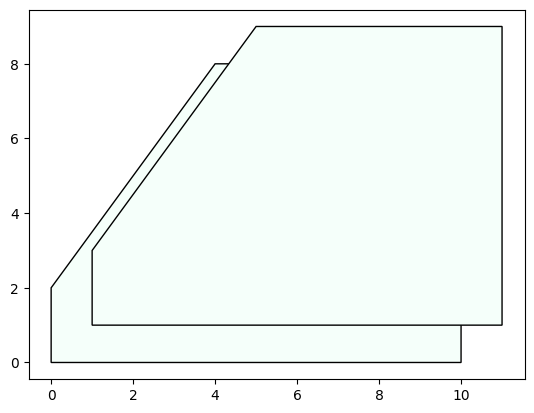

In [2]:
from pydrake.all import DecomposeAffineExpression, MathematicalProgram
from large_gcs.geometry.polyhedron import Polyhedron
from matplotlib import pyplot as plt
import numpy as np

S_coll_free_W = Polyhedron.from_vertices(([0, 0], [10, 0], [10, 8], [4, 8], [0, 2]))
rob_radius = 1
A = S_coll_free_W.set.A()
b = S_coll_free_W.set.b()[:, np.newaxis]
prog = MathematicalProgram()
x = prog.NewContinuousVariables(2, "x")
p_ROB_boundary_W = x[:, np.newaxis] - rob_radius
exprs = A @ p_ROB_boundary_W - b
A_new = []
b_new = []
map_var_to_index = {v.get_id(): i for i, v in enumerate(x)}

for expr in exprs:
    coeffs, c0 = DecomposeAffineExpression(expr[0], map_var_to_index)
    A_new.append(coeffs)
    b_new.append(c0 * -1)
A_new = np.array(A_new)
b_new = np.array(b_new)
print(A_new)
print(b_new)
new_set = Polyhedron(A_new, b_new)
fig = plt.figure()
S_coll_free_W.plot()
new_set.plot()
plt.show()

Does DecomposeAffineExpression work when you have ExpressionMin as the expression? I think then it's not an affine expression...

In [3]:
from pydrake.all import MathematicalProgram, DecomposeAffineExpression, min
import numpy as np

prog = MathematicalProgram()
x = prog.NewContinuousVariables(2, "x")
expr = min(x[0] + 1, x[1] + 2)
coeffs, c0 = DecomposeAffineExpression(expr, {v.get_id(): i for i, v in enumerate(x)})

RuntimeError: Expression min((1 + x(0)), (2 + x(1)))is not a polynomial.


In [2]:
import numpy as np
from math import sqrt
a = np.array([2,0,2,0])
np.linalg.norm(a) + 2*sqrt(2) +2*2

9.65685424949238